**<h1><center>MISSING VALUE TREATMENT</center></h1>**

Data collection is a initial part for every project. Whenever collecting data some individual will not provide all field information because some field are not mandatory. Let us say Marital_status is an attribute but some people will not enter the details as it is not mandatory.

Treating null values is most important for model building process and  data analysis.

**<h3>How to find Missing Values</h3>**

In pandas we can check out columns which having missing values.In Pandas missing data is represented by two value:
- None: None is a Python singleton object that is often used for missing data in Python code.

- NaN : NaN (an acronym for Not a Number), is a special floating-point value recognized by all systems that use the standard IEEE floating-point representation

Their are two types of function in pandas to check null values

- isnull()
- notnull()


**<u>1. Checking Null Values using isnull function</u>**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("/content/drive/My Drive/Selling Project Content/\
Data Set/Loan_default_classification.csv")

data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
data.isnull()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False


Usually we use sum function to add all True values(Which is Null values). So that we can able to find number of null values in each columns

In [ ]:
data.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

Above numbers represents number of null values in each columns. For example Credit_History has 50 Null values, Self_Employed has 32 null values and so on.

**<u>2. Checking Null Values using notnull function</u>**

In [ ]:
data.notnull().sum().sort_values(ascending=False)

Loan_ID              614
Education            614
ApplicantIncome      614
CoapplicantIncome    614
Property_Area        614
Loan_Status          614
Married              611
Gender               601
Loan_Amount_Term     600
Dependents           599
LoanAmount           592
Self_Employed        582
Credit_History       564
dtype: int64

Above numbers represents number of values in each columns. For example Loan_Id has 614 values, Education has 614 values and so on.

Normally we use isnull() function to find the number of null values in each columns.

**<h3>Treating Missing Values</h3>**

Handling missing values is very important during data preprocessing as many machine learning algorithm will not support missing values.

Different Methods to treat missing values

1. Droping rows or columns having missing values

2. Using Pandas function

3. Impute missing values for categorical Variable

4. Impute missing Values for continuous variable

5. Creating a model to predict missing values



**1. Droping rows having missing values**

Missing values handled by removing rows or columns which having null values. Columns can be removed when more than 50% of values are null values, and rows are removed when one or more column values having null.

Advantage :
- Model will be trained on dataset which all null values removed creates robust model.

Disadvantage:

- Lots of Information loss

- Accuracy will fall down if we train model on dataset in which no of rows or columns removed is high compared to model trained on dataset in which null values are replaced by values.




In [ ]:
data.dropna()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


**2. Using Pandas function**

Their are two ways of filling missing values

1. pad/fill
  - Fill methods Forward. This is known as the Last observation carried forward (LOCF) method.

  ```
  df.fillna(method='pad')
          or
  df['column_name'].fillna(method='pad')
  ```

2. bfill/backfill
  - Fill methods Backward

  ```
  df.fillna(method='backfill')
          or
  df['column_name'].fillna(method='backfill')
  ```

**3. Impute missing values for categorical Variable**

When the missing values is from categorical columns, then missing values is replaced by most frequently occured values. If the missing values is large then it is replaced by Unique values. We will use ```mode``` function to get frequently used value.

Advantage:

- Prevents data loss.
- Works well on small data set

Disadvantage:

- Addition of new features to the model while encoding, which may result in poor performance.

In [ ]:
# Helps to know the data types
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [ ]:
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

In [ ]:
data['Self_Employed'].isnull().sum()

0

**4. Impute missing Values for continuous variable**

- For continuous variabable we will replace null values using mean, median and mode. Commonly we will use mean and median for replacing the  null values. These two approximation are statistical approach for replacing null values.As if a variable has outliers then we will replace null values with median and  if a variable has no outliers then we will replace null values with mean.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


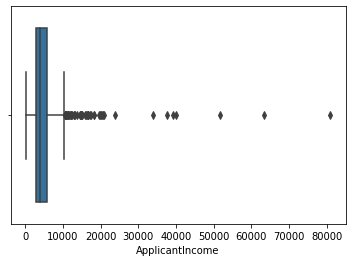

In [ ]:
import seaborn as sns
sns.boxplot(data['ApplicantIncome'])

In [ ]:
"""
From above  plot we can concluded that their are more outliers
so that we will use median
"""
data['ApplicantIncome'] = data['ApplicantIncome'].fillna(data['ApplicantIncome'].median())

**5. Creating a model to predict missing values**

- The regression or classification model can be used for the prediction of missing values depending on the nature (categorical or continuous) of the feature having missing value.